<a href="https://colab.research.google.com/github/modraqueeb/IndusVisionIntern/blob/main/Day1basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def createImage(height, width, channels=3):
    image = np.zeros((height, width, channels), dtype=np.uint8)
    return image

In [ ]:
def showImage(image, title="Image"):
    plt.imshow(image, cmap= "gray")
    plt.title(title)
    plt.axis("off")
    plt.show()
    plt.imsave(title+".png",image, cmap="gray")

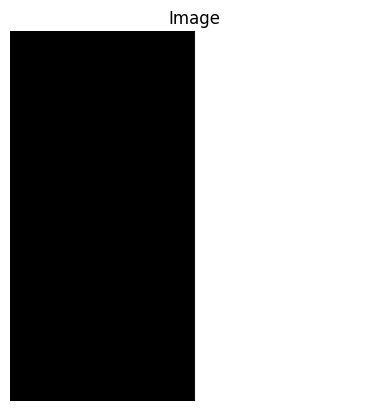

In [ ]:
image= createImage(256,256)
height,width,_=image.shape
image[:,width//2:]=255
showImage(image)


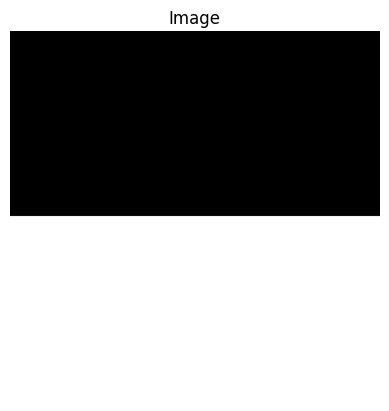

In [ ]:
image=createImage(256,256)
height,width,_=image.shape
image[height//2:,:]=255
showImage(image)

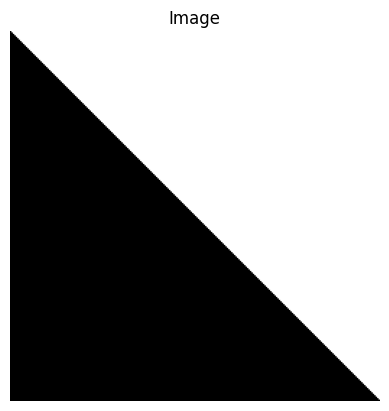

In [ ]:
image=createImage(256,256)
height,width,_=image.shape
for i in range(256):
  image[:i,i:]=255
showImage(image)

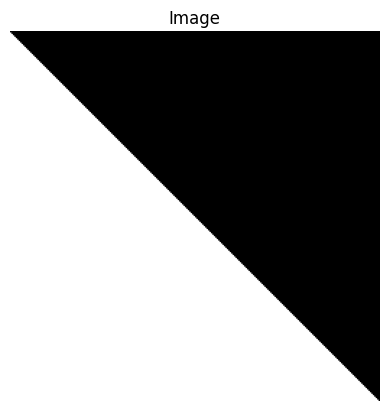

In [ ]:
image=createImage(256,256)
height,width,_=image.shape
for i in range(height):
  for j in range(width):
    if (i>j):
      image[i,j]=255
showImage(image)



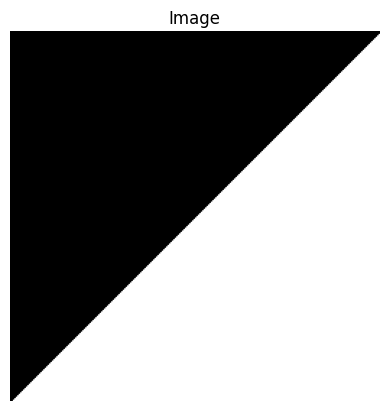

In [ ]:
image=createImage(256,256)
height,width,_=image.shape
for i in range( height):
  for j in range(width):
    if width-i<j:
      image[i,j]=255
showImage(image)



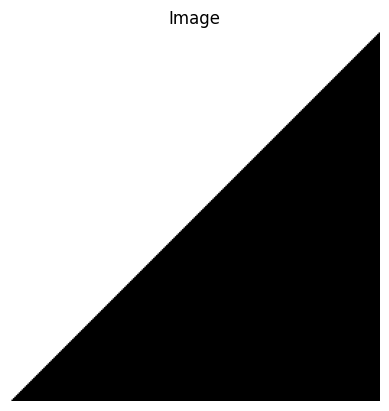

In [ ]:
image=createImage(256,256)
height,width,_=image.shape
for i in range( height):
  for j in range(width):
    if(i<width-j):
      image[i,j]=255
showImage(image)



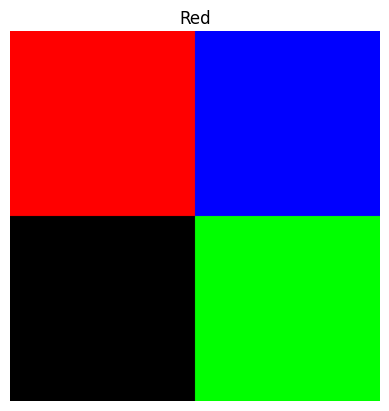

In [ ]:
image = createImage(256, 256, 3)
height, width, channels = image.shape

for i in range(height//2):
    for j in range(0, width//2):
        image[i][j] = (255, 0, 0)

for i in range(height//2,height):
  for j in range(width//2,width):
    image[i][j]=(0,255,0)

for i in range(height//2):
  for j in range(width//2,width):
    image[i][j]=(0,0,255)



showImage(image, title="quarters")

<ipython-input-152-c8ae34c56518>:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  image[i][j]=256-i


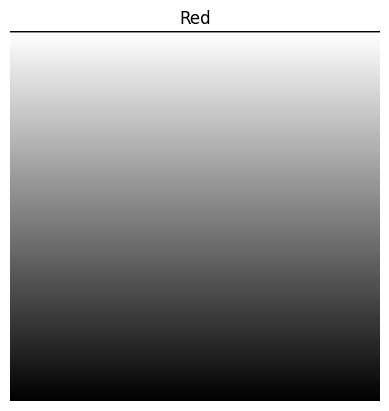

In [ ]:
image=createImage(256,256)
height,width,_=image.shape
for i in range(height):
  for j in range(width):
    image[i][j]=256-i
showImage(image, title="Gradient")

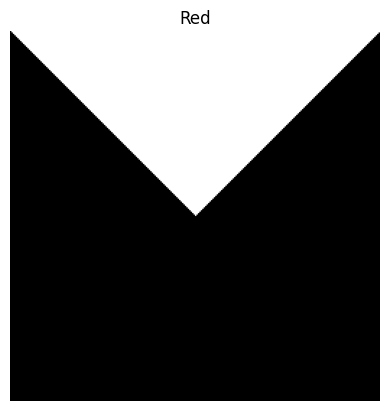

In [ ]:
image=createImage(256,256)
height,width,_=image.shape
for i in range(height):
  for j in range(width):
     if (i<j):
      if(j<width-i):
        image[i][j]=255
showImage(image, title="Quadrilateral")

SAMPLING

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Read the image

image = cv2.imread("/content/Screenshot (3).png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def ImageSampling(image, samplingFactor):
  sampledimage=image[::samplingFactor,::samplingFactor]
  return sampledimage


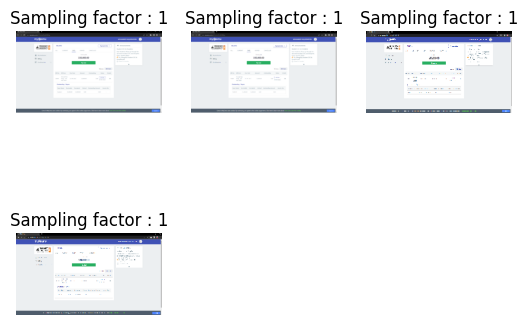

In [ ]:
ax = plt.subplot(2,3,1)
ax.set_title("Sampling factor : 1")
ax.axis('off')
plt.imshow(ImageSampling(image, samplingFactor=1))


ax = plt.subplot(2,3,2)
ax.set_title("Sampling factor : 1")
ax.axis('off')
plt.imshow(ImageSampling(image, samplingFactor=2))

ax = plt.subplot(2,3,3)
ax.set_title("Sampling factor : 1")
ax.axis('off')
plt.imshow(ImageSampling(image, samplingFactor=10))

ax = plt.subplot(2,3,4)
ax.set_title("Sampling factor : 1")
ax.axis('off')
plt.imshow(ImageSampling(image, samplingFactor=8))


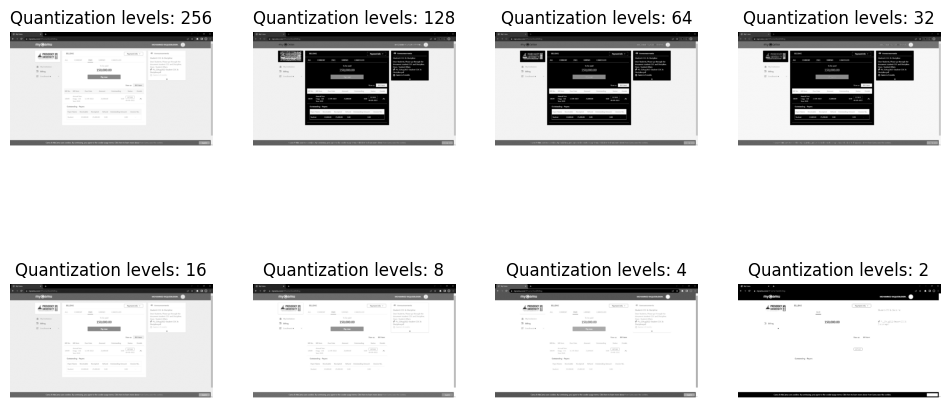

<Figure size 640x480 with 0 Axes>

In [ ]:
def ImageQuantization(image, levels):
    step = 255 // (levels - 1)                             # Divide by (levels-1) to get the step value for quantization
    quantized_image = np.round(image / step) * step        # Apply quantization by rounding pixel values to the nearest step
    quantized_image = np.uint8(quantized_image)
    return quantized_image


image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
levels = [256, 128, 64, 32, 16, 8, 4, 2]

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

for i, level in enumerate(levels, start=1):
    ax = axs.flatten()[i-1]
    ax.set_title("Quantization levels: {}".format(level))
    ax.imshow(ImageQuantization(image, level), cmap="gray")
    ax.axis('off')

plt.show()
plt.savefig('Quantization.png')
